<a href="https://colab.research.google.com/github/RMDircio/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Regina%20Dircio%20DSPT5%20-%20Intermediate%20Linear%20Algebra%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Mean of the sales data

In [0]:
# get sales data

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [3]:
# mean of sales

total = sum(sales)

sales_mean = total/len(sales)
print('The mean of the sales from last week is:','{:.2f}'.format(sales_mean))

The mean of the sales from last week is: 3052.71


Variance of the sales data

In [0]:
# Variance of sales data

# Function to minus the mean

def subtract_mean(number):
  return number - sales_mean


In [5]:
# map method to apply function

distances = list(map(subtract_mean, sales))
distances

[452.2857142857142,
 -652.7142857142858,
 -25.71428571428578,
 -254.71428571428578,
 647.2857142857142,
 197.28571428571422,
 -363.7142857142858]

In [6]:
# square and add(sum) each distance

squared_distances = list(map(lambda x: x**2, distances))
squared_distances

[204562.36734693873,
 426035.9387755103,
 661.2244897959217,
 64879.36734693881,
 418978.7959183673,
 38921.65306122446,
 132288.0816326531]

In [0]:
# get the length of the whole list (population)

sales_length_population = len(squared_distances)

In [8]:
# finally get the variance

variance_sales = sum(squared_distances)/sales_length_population
print('The variance of the sales from last week is:','{:.2f}'.format(variance_sales))

The variance of the sales from last week is: 183761.06


Standard deviation of the sales data

In [9]:
# standard deviation of sales variance

print('{:.2f}'.format(variance_sales**(1/2)))

428.67


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

Covariance between last week's sales numbers and the number of customers

In [0]:
# get last weeks customer numbers

customers_entered = [127, 80, 105, 92, 120, 115, 93]

In [11]:
# make a df of sales and customers_entered via pandas

sales_df = pd.DataFrame({'sales': sales})
sales_df['customers_entered'] = pd.Series(customers_entered)
sales_df

,sales,customers_entered
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [12]:
# caluclate covariance matrixs

sales_df.corr()

,sales,customers_entered
sales,1.000000,0.962834
customers_entered,0.962834,1.000000


In [13]:
# correlation via pandas library

sales_df['sales'].corr(sales_df['customers_entered'])

0.9628339778148909

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

standard deviation of customers who entered the store last week

In [14]:
# standard deviation of sales and customers_entered

std_sales = sales_df['sales'].std(ddof=1)

std_customers_entered = sales_df['customers_entered'].std(ddof=1)
print('The standard deviation for sales is:','{:.2f}'.format(std_sales))
print('The standard deviation for customers who entered last week is:','{:.2f}'.format(std_customers_entered))

The standard deviation for sales is: 463.02
The standard deviation for customers who entered last week is: 17.06


In [15]:
# covariance of sales and customers_entered via pandas

cov_sales_customers = sales_df['sales'].cov(sales_df['customers_entered'])
cov_sales_customers

7604.357142857142

In [0]:
# denominator
# by hand

denom = std_sales * std_customers_entered

In [17]:
# correlation
# by hand

corr_sales_customers = cov_sales_customers / denom
corr_sales_customers

0.9628339778148909

In [18]:
sales_df.corr()

,sales,customers_entered
sales,1.000000,0.962834
customers_entered,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [19]:
# Clean titanic csv: https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv

url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'

titanic_df = pd.read_csv(url)
titanic_df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [20]:
# calculate the covariance, whole titanic_df

titanic_df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [21]:
# calculate the correlation, whole titanic_df

titanic_df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


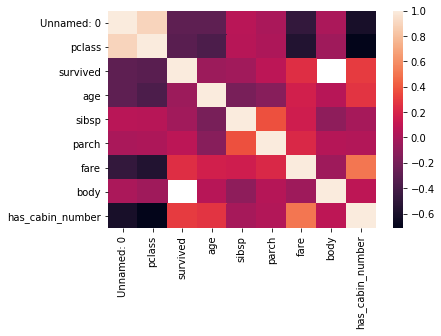

In [22]:
# heat map for fun visuals

sns.heatmap(titanic_df.corr());

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

*A synonym for orthogonal is vectors who meet at right angles.*

In [23]:
# generate two random vector

c = np.random.randn(3)
d = np.random.randn(3)
c,d

(array([-0.36840865,  1.04982777,  0.00481564]),
 array([-0.15567264,  1.55519468,  1.39116923]))

In [0]:
# make d orthogonal to c

d -= d.dot(c) * c / np.linalg.norm(c)**2

In [25]:
# check work
# dot product = 0 = orthogonal

np.dot(c,d)

-1.6653345369377348e-16

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
# get a and b vectors

a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

In [27]:
# check dot product = 0

np.dot(a,b)

-40

*Vectors a and b are not orthogonal. There dot product does not equal zero.*

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
# get c vector

c = np.array([2, -15, 6, 20])

### What is $||c||^2$? 

In [29]:
# squared norm of c

print('The squared norm of c is:', '{:.2f}'.format((np.linalg.norm(c))**2))

The squared norm of c is: 665.00


### What is $c \cdot c$? 

In [30]:
# dot product of c and c

print('The dot product of c and c is:', '{:.2f}'.format(np.dot(c,c)))

The dot product of c and c is: 665.00


### What is $c^{T}c$?

In [31]:
# get c df

pd.DataFrame(c)

,0
0,2
1,-15
2,6
3,20


In [32]:
# transpose c

c_transpose = c.T
print(pd.DataFrame(c_transpose))

    0
0   2
1 -15
2   6
3  20


In [33]:
# multiply c_transpose by c

np.matmul(c_transpose,c)

665

What do these quantities have in common?

*They all equal 665.*

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$$d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = $$
$$7 \begin{bmatrix} 1 \\ 0 \end{bmatrix} = $$ 
$$12 \begin{bmatrix} 0 \\ 1 \end{bmatrix} = $$
$$d = 7\hat{i} + 12\hat{j}$$


$$ e = \begin{bmatrix} 2 \\ 11 \\-8 \end{bmatrix} = $$
$$ 2 \begin{bmatrix} 1 \\ 0  \\ 0\end{bmatrix} = $$ 
$$ 11 \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} = $$
$$ -8 \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = $$
$$e = 2\hat{i} + 11\hat{j} +(-8\hat{k})$$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [34]:
# get f vector

f = np.array([4, 12, 11, 9, 2])
f

array([ 4, 12, 11,  9,  2])

In [35]:
# get length

f_norm = np.linalg.norm(f)
f_norm

19.131126469708992

In [36]:
# find f's unit vector, length = 1

f_hat = f / f_norm
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

In [37]:
# check norm of f_hat
# should = 1

f_hat_norm = np.linalg.norm(f_hat)
f_hat_norm

0.9999999999999999

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

Vector a and b: dependent

In [38]:
# dependent vectors a and b

vector_a = [-2, 3]
vector_b = np.multiply(vector_a, 3) # vector a scaled by 3
print(vector_a, '\n', vector_b)

[-2, 3] 
 [-6  9]


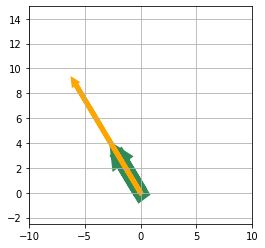

In [39]:
# graph vectors a and b

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-10,10)          
plt.ylim(-2.5,15)

for myvect, mycolor, width in [(vector_a, 'seagreen', 15), (vector_b, 'orange', 5)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor,
              length_includes_head=True)

Vector c and d: independent

In [40]:
# get random c and d vectors

vector_c = np.random.randint(low=1, high=5, size=2)
vector_d = np.random.randint(low=1, high=5, size=2)
print(vector_c, '\n', vector_d)

[3 4] 
 [3 3]


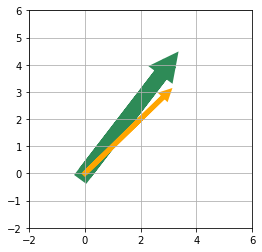

In [41]:
# graph vectors c and d
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-2,6)          
plt.ylim(-2,6)

for myvect, mycolor, width in [(vector_c, 'seagreen', 15), (vector_d, 'orange', 5)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor,
              length_includes_head=True)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# get g and h vectors

g = np.array([1, 2])
h = np.array([4, 8])

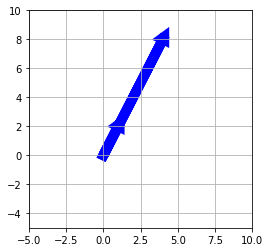

In [48]:
# check g and h on a graph
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-5,10)          
plt.ylim(-5,10)

# Display
for myvect in [g, h]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=10, 
              color='blue')

In [49]:
# linear combination

a,b=(2,3)
linear_combo= np.multiply(g, a) + np.multiply(h, b) 
print(linear_combo)

[14 28]


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# get vectors l, m, n
l = np.array([1, 2, 3])
m = np.array([-1, 0, 7])
n = np.array([4, 8, 2])

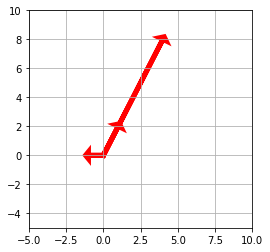

In [56]:
# check l, m and n on a graph
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-5,10)          
plt.ylim(-5,10)

# Display
for myvect in [l, m, n]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.5, 
              head_length=0.2, 
              linewidth=5, 
              color='red')

In [57]:
# linear combination

a,b,c=(2,3,4)
linear_combo= np.multiply(l, a) + np.multiply(m, b) + np.multiply(n, c) 
print(linear_combo)

[15 36 35]


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



In [0]:
# get two vectors

vector_1 = np.array([-5, 5])
vector_2 = np.array([5, 5])

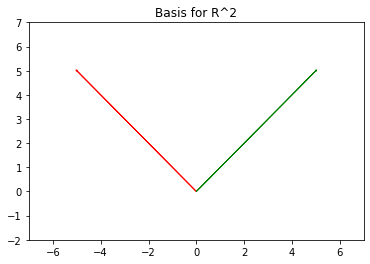

In [61]:
# graph vector_1 and vector_2
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-7,7)          
plt.ylim(-2,7)
plt.title("Basis for R^2")
plt.show()

## 6.2 What does it mean to form a basis?

*Forming a basis is a means to find dimensionality.*

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [63]:
# get vector P

P = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])
P

array([[ 1,  2,  3],
       [-1,  0,  7],
       [ 4,  8,  2]])

In [70]:
# calculate the rank

np.linalg.matrix_rank(P)


3

## 7.2 What does the rank of a matrix tell us?

*The rank of a matrix gives the number of dimensions spanned by the matrix. It is a way to simplify the matrix. A 3d matrix could actually be a 2d matrix, but is just being displayed in a 3d form.*

# Linear Projections - Stretch Goal

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

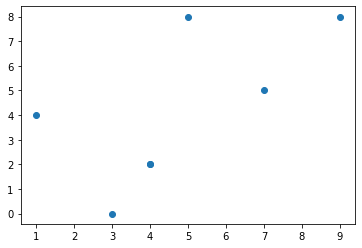

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()